本文档用于处理IRIS

In [1]:
import sunpy
import sunpy.map
import numpy as np
from math import *
import astropy.units as u
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sunpy.coordinates import frames
import matplotlib.gridspec as gridspec
from scipy.interpolate import interp1d
from astropy.coordinates import SkyCoord
from matplotlib.patches import ConnectionPatch
import os,cv2
from scipy.optimize import fmin
from scipy.ndimage import affine_transform
import shutil
from scipy.io import readsav
import glob
from matplotlib.patches import Rectangle
from scipy.ndimage import zoom

c:\Users\19671\anaconda3\envs\sun\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_list=glob.glob(r'D:\Learning\PHD1st\magnetic_reconnecion\data\IRIS\iris_l2_20240618_163141_3602506433_raster\*.fits')
rsm=fits.open(file_list[399])
rsm_1400=fits.open(r'D:\Learning\PHD1st\magnetic_reconnecion\data\IRIS\iris_l2_20240618_163141_3602506433_SJI_1400_t000.fits')

In [22]:
solar_xy=readsav(r'D:\Learning\PHD1st\magnetic_reconnecion\data_process\solar_xy.sav')

In [23]:
print(solar_xy.keys())

dict_keys(['solar_x', 'solar_y'])


In [24]:
solar_x=solar_xy['solar_x']
solar_y=solar_xy['solar_y']

In [6]:
siiv=rsm[3].data

In [3]:
sji1400=rsm_1400[0].data

In [36]:
new_map=np.log(sji1400[799,:,:]+201)
print(new_map.max(),new_map.min())

9.221997 0.0


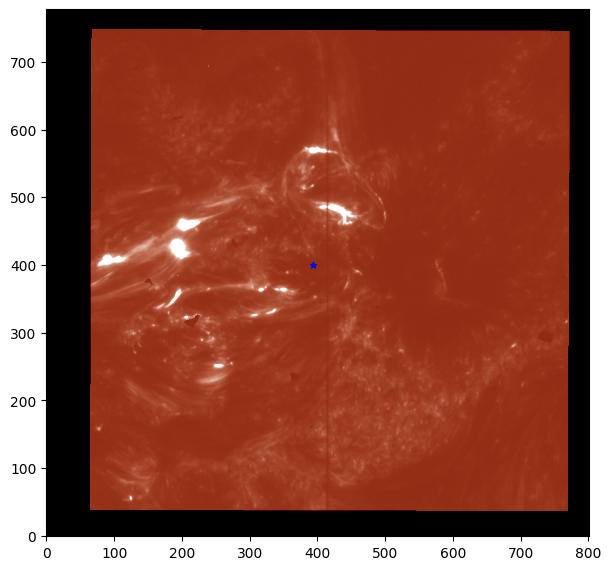

In [37]:
plt.figure(figsize=(7,7))
plt.imshow(new_map,origin='lower',cmap='irissji1400',vmin=4.8,vmax=6)
fig_x=348/354.533*400.5
plt.scatter(fig_x,400,s=20,marker='*',c='blue')

In [8]:
print(sji1400[799,:,:].mean(),sji1400[799,:,:].max(),sji1400[799,:,:].min())

-27.217752 9916.25 -200.0


In [39]:
three_sji=readsav(r'D:\Learning\PHD1st\magnetic_reconnecion\data_process\three_sji_image.sav')
print(three_sji.keys())

dict_keys(['matrix_struct'])


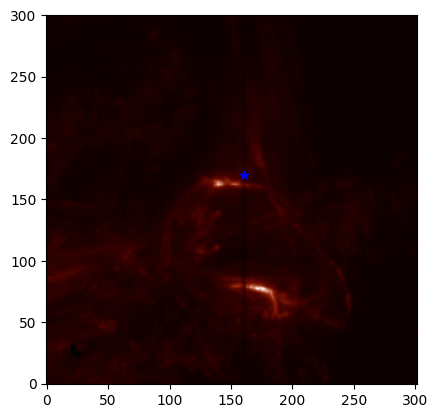

In [46]:
fig1=three_sji['matrix_struct'][0][0]
plt.imshow(fig1,origin='lower',cmap='irissji1400')
fig_x=(356.57-330)/50*302
plt.scatter(fig_x,170,marker='*',color='blue')